In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-in-tech-survey/survey.csv


# 1. Introduction

- Work often constitutes a significant portion of our lives, where we not only earn a living but also form connections. A fulfilling job can positively impact **mental health** and **overall well-being**.

- Mental health is integral to our overall well-being, shaping our thoughts, emotions, and behaviors in our daily lives. Its importance in the tech workspace is paramount, influencing our fundamental sense of wellness.

- Good mental health brings about a multitude of benefits, positively impacting various aspects of an individual's life. Some of the key advantages include:

    - **Enhanced Emotional Well-being.**
    - **Improved Relationships.**

    - **Increased Resilience.** 

    - **Higher Productivity and Performance.** 

    - **Better Physical Health.** 

# 2. Problem Statement

- Daily life involves natural fluctuations, influenced by various factors. However, when the ratio of these fluctuations becomes imbalanced, it can lead to mental and physical burnout, disrupting life's equilibrium and potentially resulting in  **Anxiety** & **Depression**.
- We are trying to analyse what influences most for the mental health issues people face in a Tech workspace with the help of the data collected by OSMI

**<h4>Scenario:</h4>**

<a href="https://osmihelp.org/">**OSMI**</a>, **Open Sourcing Mental Illness** is a non-profit organization focused on changing how mental health is addressed in the tech community. Founded by **Ed Finkler**, a developer and advocate for mental health awareness

- OSMI aims to raise awareness, provide support, and create an open dialogue about mental health issues in the tech industry.

- They perform surveys to **measure attitudes** towards mental health in the tech workplace.

- OSMI encourages open conversations and provides educational materials to help employers and employees better understand and manage mental health issues in the workplace.

# 3. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go  
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore") 

In [3]:
pd.set_option('display.float_format', lambda x : '%.2f' %x)

# 4. Data Acquisition

- This dataset is obtained from a survey in 2014.

- It describes the attitudes towards mental health and frequency of mental health disorders in the tech workplace.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1259 | 27 | 296 KB| 


| Id | Features | Description |
| :-- | :--| :--| 
|01|**Timestamp**|Time the survey was submitted.|
|02|**Age**|The age of the person.| 
|03|**Gender**|The gender of the person.|
|04|**Country**|The country name where person belongs to.|
|05|**state**|The state name where person belongs to.|
|06|**self_employed**|Is the person self employed or not.|
|07|**family_history**|Does the person's family history had mental illness or not?|
|08|**treatment**|Have you sought treatment for a mental health condition?|
|09|**work_intefere**|If you have a mental health condition, do you feel that it interferes with your work?|
|10|**no_employees**|How many employees does your company or organization have?|
|11|**remote_work**|Do you work remotely (outside of an office) at least 50% of the time?|
|12|**tech_company**|Is your employer primarily a tech company/organization?|
|13|**benifits**|Does your employer provide mental health benefits?|
|14|**care_options**|Do you know the options for mental health care your employer provides?|
|15|**wellness_program**|Has your employer ever discussed mental health as part of an employee wellness program?|
|16|**seek_help**|Does your employer provide resources to learn more about mental health issues and how to seek help?|
|17|**anonymity**|Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?|
|18|**leave**|How easy is it for you to take medical leave for a mental health condition?|
|19|**mental_health_consequence**|Do you think that discussing a mental health issue with your employer would have negative consequences?|
|20|**phy_health_consequence**|Do you think that discussing a physical health issue with your employer would have negative consequences?|
|21|**coworkers**|Would you be willing to discuss a mental health issue with your coworkers?|
|22|**supervisor**|Would you be willing to discuss a mental health issue with your direct supervisor(s)?|
|23|**mental_health_interview**|Would you bring up a mental health issue with a potential employer in an interview?|
|24|**phs_health_interivew**|Would you bring up a physical health issue with a potential employer in an interview?|
|25|**mental_vs_physical**|Do you feel that your employer takes mental health as seriously as physical health?|
|26|**obs_consequence**|Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?|
|27|**comments**|Any additional notes or comments.|

In [4]:
data = pd.read_csv("/kaggle/input/mental-health-in-tech-survey/survey.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
data.shape

(1259, 27)

- We have a total of **1259** rows & **27** columns in the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# 5. Data Pre Pofiling

In [7]:
data.describe()

,Age
count,1259.00
mean,79428148.31
std,2818299442.98
min,-1726.00
25%,27.00
50%,31.00
75%,36.00
max,99999999999.00


**Incorrect values in Age:**
   - Max Age of a person cannot be **99999999999.00**.
   - And also No person would have an age of neagtive **-1726**.

- Since most countries designate **18 years** as the legal age to commence work, let's examine the Age field for any records below this threshold

In [8]:
data[data['Age']<18]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


- Similarly, let's assess the Age field for individuals within a maximum age range of approximately **75 years**.

In [9]:
data[data['Age']>75]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN


- Based on the above output, it appears that these individuals may prefer not to disclose their personal information and have provided potentially random or unspecified values.

- In this scenario, we can address this issue similarly to how we handle **missing values**, by replacing them with the **mean or median** according to the data.

In [10]:
data.shape[0]-data.count()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

- Percentage of missing values.

In [11]:
100*((data.shape[0]-data.count())/data.shape[0])

Timestamp                    0.00
Age                          0.00
Gender                       0.00
Country                      0.00
state                       40.91
self_employed                1.43
family_history               0.00
treatment                    0.00
work_interfere              20.97
no_employees                 0.00
remote_work                  0.00
tech_company                 0.00
benefits                     0.00
care_options                 0.00
wellness_program             0.00
seek_help                    0.00
anonymity                    0.00
leave                        0.00
mental_health_consequence    0.00
phys_health_consequence      0.00
coworkers                    0.00
supervisor                   0.00
mental_health_interview      0.00
phys_health_interview        0.00
mental_vs_physical           0.00
obs_consequence              0.00
comments                    86.97
dtype: float64

We have missing values in the following columns **state, self_employed, work_interfere and comments.**

In [12]:
data_missing = pd.DataFrame(index = data.columns.values)

In [13]:
data_missing['Null'] = data.isnull().sum().values
data_missing

,Null
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [14]:
data_missing['Null percentage'] = 100*((data.shape[0]-data.count())/data.shape[0])
data_missing

,Null,Null percentage
Timestamp,0,0.00
Age,0,0.00
Gender,0,0.00
Country,0,0.00
state,515,40.91
self_employed,18,1.43
family_history,0,0.00
treatment,0,0.00
work_interfere,264,20.97
no_employees,0,0.00


In [15]:
data['Country'].value_counts()

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [16]:
data[data['Country'] == 'United States']['state'].value_counts().head()

state
CA    138
WA     70
NY     56
TN     45
TX     44
Name: count, dtype: int64

In [17]:
data['state'].mode()

0    CA
Name: state, dtype: object

In [18]:
data[data['Country'] != 'United States']

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
11,2014-08-27 11:32:49,29,male,Bulgaria,NaN,NaN,No,No,Never,100-500,...,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,2015-05-05 15:16:25,32,female,United Kingdom,NaN,No,No,No,NaN,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,No,Yes,No,No,NaN
1245,2015-05-06 10:14:50,22,Male,Australia,NaN,No,Yes,Yes,Often,100-500,...,Don't know,Maybe,Maybe,No,Yes,No,Maybe,Don't know,Yes,In australia all organisations of a certain si...
1247,2015-05-07 10:08:50,36,male,Finland,NaN,No,No,Yes,Often,6-25,...,Very difficult,Yes,No,Some of them,No,No,Maybe,Don't know,Yes,NaN
1251,2015-08-17 09:38:35,36,Male,South Africa,NaN,No,Yes,Yes,Often,100-500,...,Somewhat easy,No,No,Some of them,Yes,No,Yes,Yes,No,NaN


In [19]:
#Percentage of data outside of the United States 

100 * (data[data['Country'] != 'United States'].shape[0] / data.shape[0])

40.3494837172359

We face a situation where **40%** of the data is from outside the United States, and the 'state' field has **40%** missing values.
- It's important to note that the mode for the 'state' field is California, a location within the United States. 
- Therefore, it wouldn't be appropriate to replace missing values in the 'state' column for different countries with 'California'.

In [20]:
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [21]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

- Observations.

| Field | Missing Values | Proportion | Solution
| :-- | :-- | :-- | :-- |
| State | 515 | 40.91 %| Drop the column | 
| Self_employed | 18 | 1.43 %| Replace with Mode | 
| Work_interfere | 264 | 20.94 %| Replace with Mode | 
| Comments | 1095 | 86.97 %| Drop the column | 

In [22]:
data['Gender'].value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

- To facilitate a clearer analysis, we will categorize the 'Gender' field into **'Male'**,' **'Female',** and **'Trans'**.

**Corrections needed:**

"""

1. Inconsistencies in the Age field.
2. Missing Values:
    - state - Delete the field.             (40% values are missing).
    - self_employed - Replace with Mode.    (1.4% values are missing).
    - work_interfere - Replace with Mode.   (21% values are missing). 
    - comments - Delete the field.          (87% values are missing).
    
3. Duplicate - not allowed.
4. Gender - Categorize into Male, Female & Others - for the better understanding of our analysis.
5. Type Casting of Datetime format.

"""

# 6. Data Pre Processing

- Performing the above mentioned corrections for the Missing values

In [23]:
data['self_employed'].mode()[0]

'No'

In [24]:
data['self_employed'] = data['self_employed'].replace(np.nan, data['self_employed'].mode()[0])
data['work_interfere'] = data['work_interfere'].replace(np.nan, data['work_interfere'].mode()[0])

data.drop(['state','comments'], axis=1, inplace = True)

- Lets verify the integrity of missing values again.

In [25]:
data_missing['Null percentage'] = 100*((data.shape[0]-data.count())/data.shape[0])
data_missing

,Null,Null percentage
Timestamp,0,0.00
Age,0,0.00
Gender,0,0.00
Country,0,0.00
state,515,NaN
self_employed,18,0.00
family_history,0,0.00
treatment,0,0.00
work_interfere,264,0.00
no_employees,0,0.00


In [26]:
100*((data.shape[0]-data.count())/data.shape[0])

Timestamp                   0.00
Age                         0.00
Gender                      0.00
Country                     0.00
self_employed               0.00
family_history              0.00
treatment                   0.00
work_interfere              0.00
no_employees                0.00
remote_work                 0.00
tech_company                0.00
benefits                    0.00
care_options                0.00
wellness_program            0.00
seek_help                   0.00
anonymity                   0.00
leave                       0.00
mental_health_consequence   0.00
phys_health_consequence     0.00
coworkers                   0.00
supervisor                  0.00
mental_health_interview     0.00
phys_health_interview       0.00
mental_vs_physical          0.00
obs_consequence             0.00
dtype: float64

- **Lets check for any duplicated values**

In [27]:
data.duplicated().any()

False

In [28]:
print('Contains any Duplicated rows ?', data.duplicated().any())

Contains any Duplicated rows ? False


- **Typecasting of Timestamp**

In [29]:
data['Timestamp'].unique()

array(['2014-08-27 11:29:31', '2014-08-27 11:29:37',
       '2014-08-27 11:29:44', ..., '2015-11-07 12:36:58',
       '2015-11-30 21:25:06', '2016-02-01 23:04:31'], dtype=object)

In [30]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1259 non-null   int64         
 2   Gender                     1259 non-null   object        
 3   Country                    1259 non-null   object        
 4   self_employed              1259 non-null   object        
 5   family_history             1259 non-null   object        
 6   treatment                  1259 non-null   object        
 7   work_interfere             1259 non-null   object        
 8   no_employees               1259 non-null   object        
 9   remote_work                1259 non-null   object        
 10  tech_company               1259 non-null   object        
 11  benefits                   1259 non-null   object        
 12  care_o

- We need to address the concerns present in the **Age** & **Gender** fields.

In [32]:
#unique values in the Gender field

print('Unique Genders present in the data :', data['Gender'].nunique())
print('Unique Genders present in the data :', set(data['Gender']))

Unique Genders present in the data : 49
Unique Genders present in the data : {'m', 'Mal', 'Neuter', 'Male (CIS)', 'something kinda male?', 'Nah', 'Cis Female', 'Male-ish', 'f', 'Female ', 'male leaning androgynous', 'woman', 'Malr', 'Cis Man', 'Male', 'Enby', 'Female (cis)', 'p', 'Make', 'msle', 'Cis Male', 'Genderqueer', 'Femake', 'Female', 'Male ', 'Mail', 'Trans-female', 'maile', 'A little about you', 'female', 'Guy (-ish) ^_^', 'cis-female/femme', 'All', 'non-binary', 'male', 'queer', 'M', 'Man', 'femail', 'cis male', 'queer/she/they', 'Agender', 'Woman', 'fluid', 'Androgyne', 'F', 'Female (trans)', 'Trans woman', 'ostensibly male, unsure what that really means'}


In [33]:
data['Gender'].str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [34]:
unique_gender = data['Gender'].str.lower().unique()

# Stratas of Gender category
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", 
            "male ", "man","msle", "mail", "malr","cis man", "Cis Male", 
            "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", 
             "non-binary","nah", "all", "enby", "fluid", "genderqueer", 
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", 
             "trans woman", "neuter", "female (trans)", "queer", 
             "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ", 
              "cis-female/femme", "female (cis)", "femail"]

# Iterate over rows and replace the inconsistent data with right data
for (row, col) in data.iterrows():
    if str.lower(col['Gender']) in male_str:
        data['Gender'].replace(to_replace=col['Gender'], value='male', inplace=True)
        
    if str.lower(col['Gender']) in female_str:
        data['Gender'].replace(to_replace=col['Gender'], value='female', inplace=True)
        
    if str.lower(col['Gender']) in trans_str:
        data['Gender'].replace(to_replace=col['Gender'], value='trans', inplace=True)

# Remove rest of the unnecessary text
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

# Display the unique value of Gender feature
print(data['Gender'].unique())

['female' 'male' 'trans']


- Substituting the outliers in the Age field with the **median** value, as the median is not influenced by the outliers.

In [35]:
data['Age'].median()

31.0

In [36]:
data['Age'][data['Age'] > 75] = data['Age'].median()
data['Age'][data['Age'] < 18] = data['Age'].median()

In [37]:
data['Age'].describe()

count   1257.00
mean      32.07
std        7.27
min       18.00
25%       27.00
50%       31.00
75%       36.00
max       72.00
Name: Age, dtype: float64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1257 non-null   datetime64[ns]
 1   Age                        1257 non-null   int64         
 2   Gender                     1257 non-null   object        
 3   Country                    1257 non-null   object        
 4   self_employed              1257 non-null   object        
 5   family_history             1257 non-null   object        
 6   treatment                  1257 non-null   object        
 7   work_interfere             1257 non-null   object        
 8   no_employees               1257 non-null   object        
 9   remote_work                1257 non-null   object        
 10  tech_company               1257 non-null   object        
 11  benefits                   1257 non-null   object        
 12  care_option

# 7. Exploratory Data Analysis

- A Series of questions to uncover patterns, trends, anomalies, relationships, and key insights without making any formal assumptions about the data.

**Q.** Which Age group are more conscious about their mental health ?

In [39]:
#Lets try to plot Age vs Treatment
data['treatment'].value_counts()

treatment
Yes    635
No     622
Name: count, dtype: int64

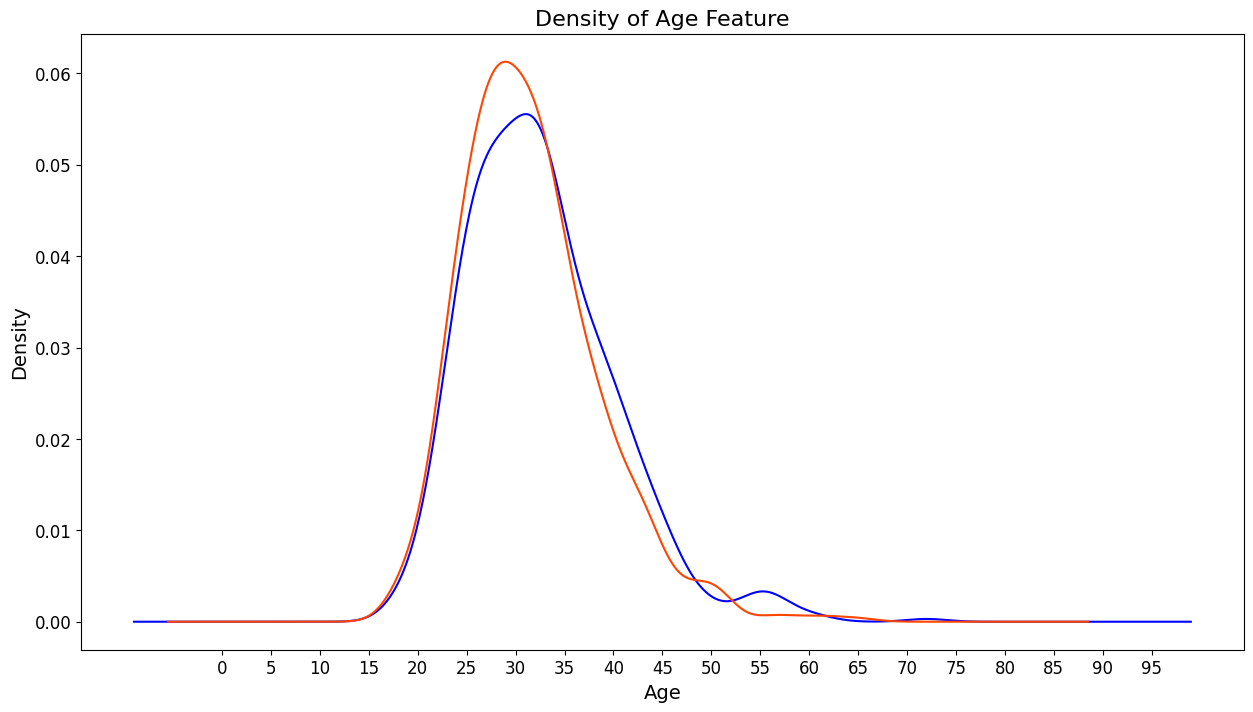

In [40]:
figure = plt.figure(figsize=[15, 8])

data[data['treatment'] == 'Yes']['Age'].plot.kde(color='blue')
data[data['treatment'] == 'No']['Age'].plot.kde(color='orangered')

plt.xticks(ticks=np.arange(0, 100, 5), size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.title(label='Density of Age Feature', size=16)
plt.show()

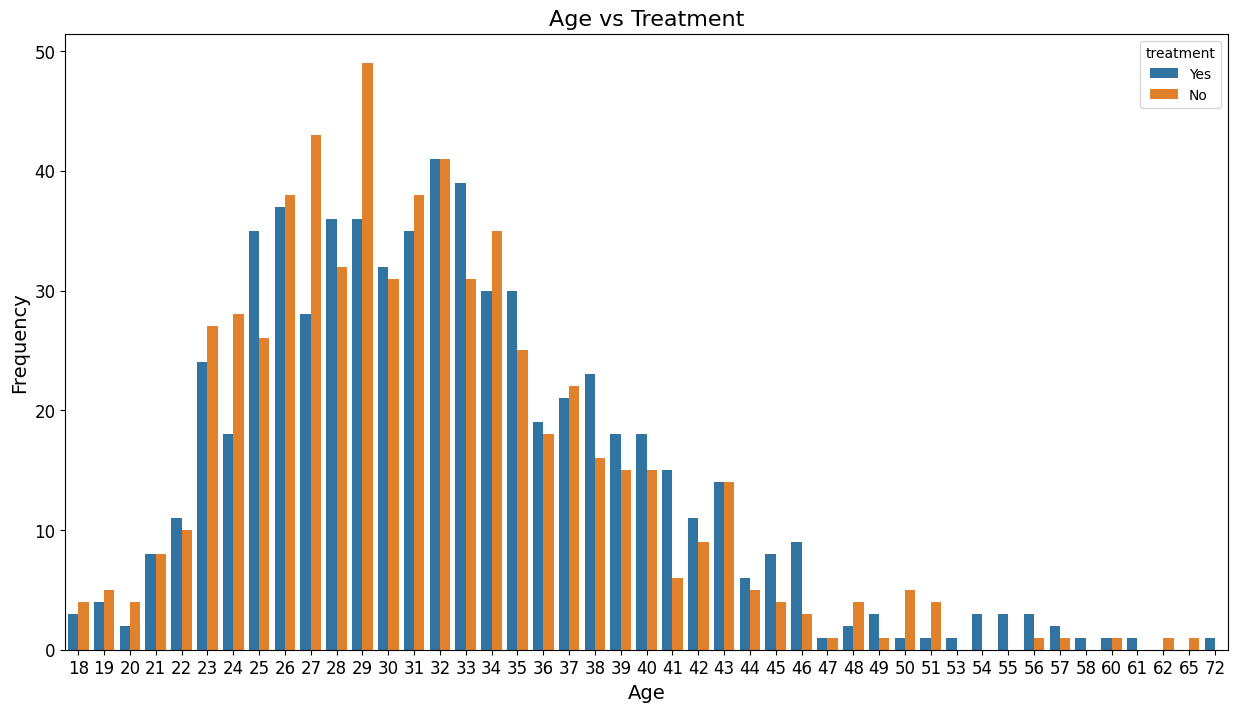

In [41]:
fig = plt.figure(figsize=(15, 8))

sns.countplot(x='Age', hue='treatment', data=data)

plt.title(label='Age vs Treatment', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.grid(b=True)

plt.show()

- Analyzing the proportions, it suggests that individuals over the age of **30** are addressing their mental health concerns.

**Q.** What is the Density distribution Age field ?

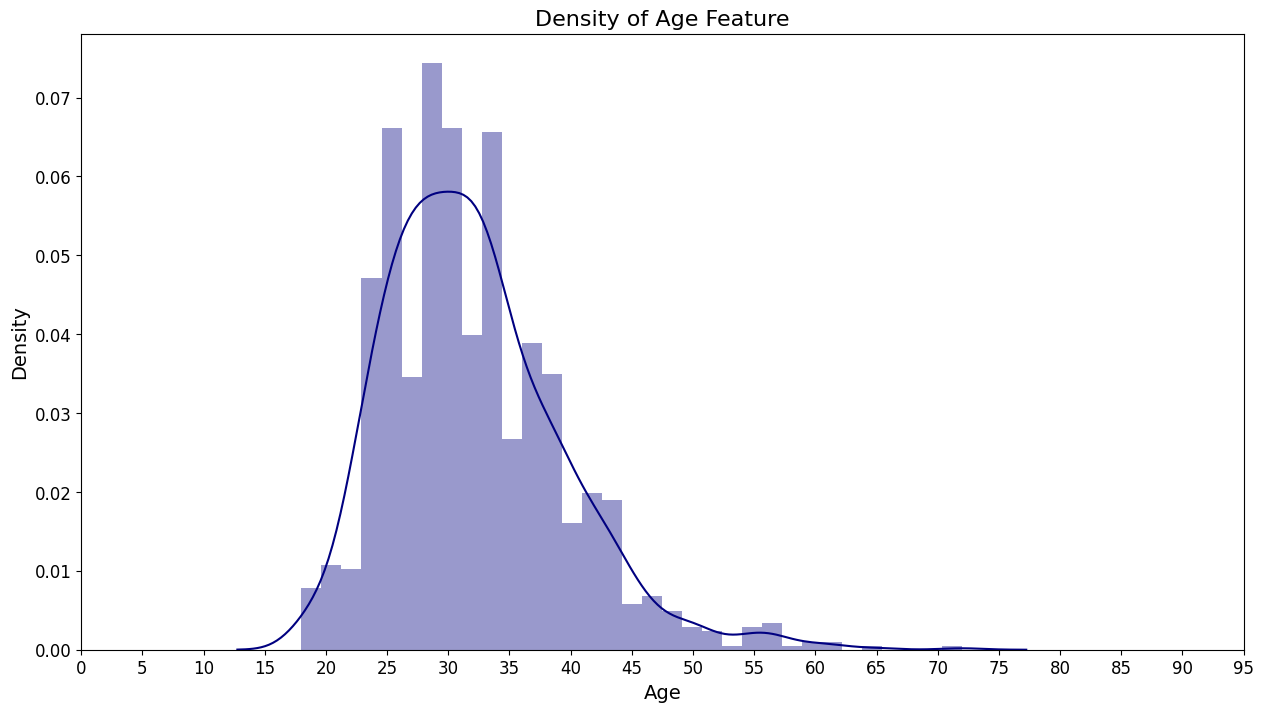

In [42]:
figure = plt.figure(figsize=[15, 8])

sns.distplot(data['Age'], kde=True, color = 'navy')

plt.xticks(ticks=np.arange(0, 100, 5), size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.title(label='Density of Age Feature', size=16)
plt.show()

**Observation:**

- The data shows a prominent peak occurring between the **mid-20s** to about **mid-30s**, indicating that the majority of individuals fall within this age range.

**Q.** What is the assosciation between Gender & Treatment ?

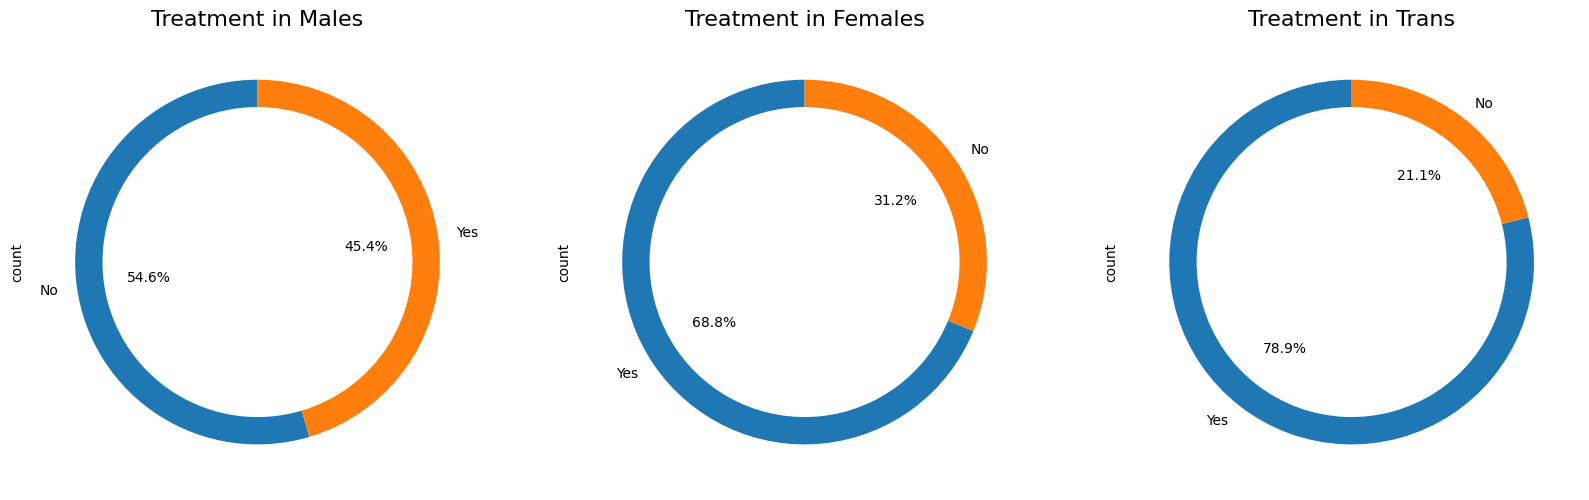

In [43]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
data['treatment'][data['Gender'] == 'male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Males', size=16)

plt.subplot(1,3,2)
data['treatment'][data['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Females', size=16)

plt.subplot(1,3,3)
data['treatment'][data['Gender'] == 'trans'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Trans', size=16)

plt.show()


- Based on the data, it appears that individuals identifying as **Trans** and **Females** exhibit a higher tendency to seek treatment for mental health issues in comparison to **Males**.

**Q.** What is the assosciation between Treatment  & Work_interference ?

In [44]:
data['treatment'].value_counts()

treatment
Yes    635
No     622
Name: count, dtype: int64

In [45]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    729
Never        213
Rarely       173
Often        142
Name: count, dtype: int64

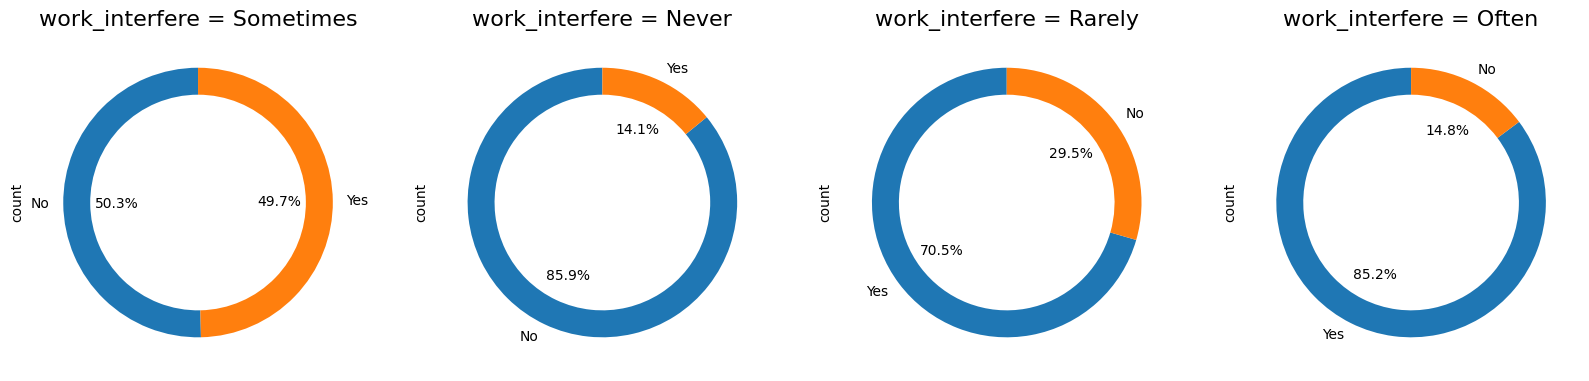

In [46]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,4,1)
data['treatment'][data['work_interfere'] == 'Sometimes'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Sometimes', size=16)

plt.subplot(1,4,2)
data['treatment'][data['work_interfere'] == 'Never'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Never', size=16)

plt.subplot(1,4,3)
data['treatment'][data['work_interfere'] == 'Rarely'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Rarely', size=16)

plt.subplot(1,4,4)
data['treatment'][data['work_interfere'] == 'Often'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Often', size=16)

plt.show()



- We can observe that employees who are more **'Often'** & **'Rarely'** interfered during work are likely to have Mental health issues and hence are seeking Treatment.

**Q.** Do individuals show a greater willingness to seek treatment for mental health issues if there is a family history of such conditions?

In [47]:
data['family_history'].value_counts()

family_history
No     767
Yes    490
Name: count, dtype: int64

In [48]:
data.groupby(['treatment','family_history'])['family_history'].count()['No']

family_history
No     495
Yes    127
Name: family_history, dtype: int64

In [49]:
data.groupby(['treatment','family_history'])['family_history'].count()['Yes']

family_history
No     272
Yes    363
Name: family_history, dtype: int64

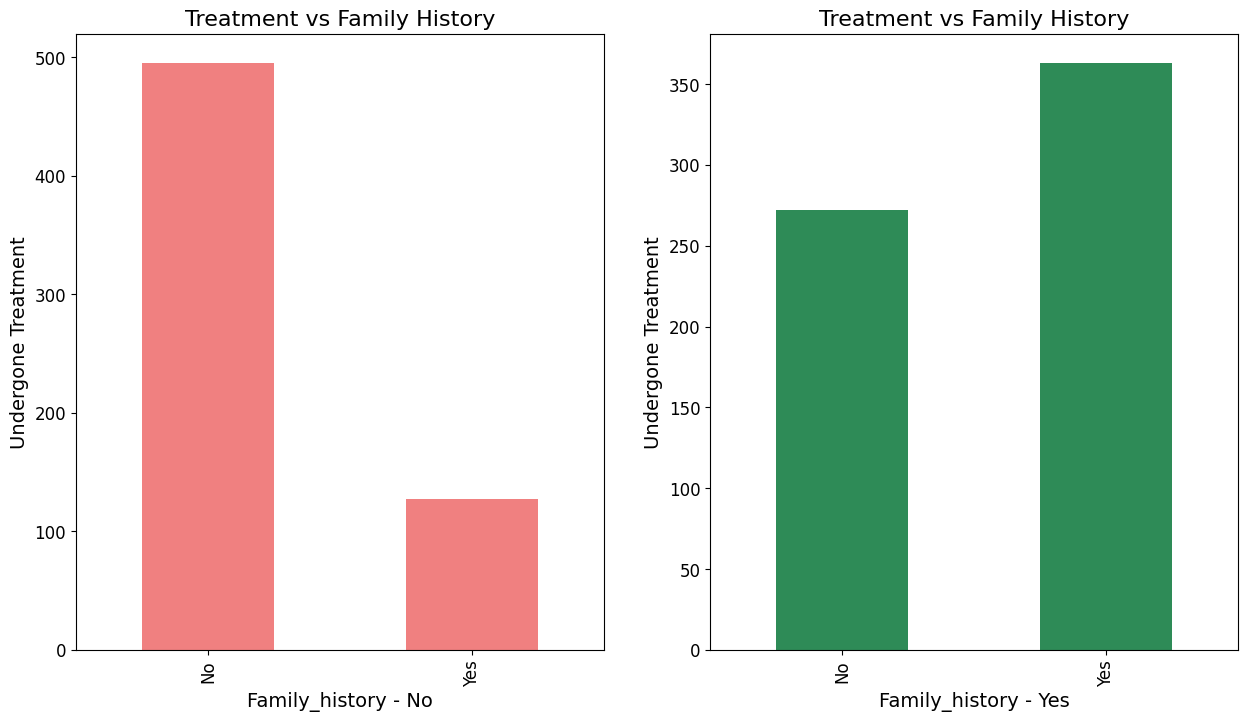

In [50]:
figure = plt.figure(figsize=[15, 8])

plt.subplot(1,2,1)
data.groupby(['treatment','family_history'])['family_history'].count()['No'].plot.bar(color='lightcoral')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Family_history - No', size=14)
plt.ylabel(ylabel='Undergone Treatment', size=14)
plt.title(label='Treatment vs Family History', size=16)

plt.subplot(1,2,2)
data.groupby(['treatment','family_history'])['family_history'].count()['Yes'].plot.bar(color='seagreen')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Family_history - Yes', size=14)
plt.ylabel(ylabel='Undergone Treatment', size=14)
plt.title(label='Treatment vs Family History', size=16)


plt.show()

- We observe that employees with a **family history** of mental health issues are **more inclined** to choose **treatment**. 
- In contrast, employees without a family history of mental health issues may have **lower awareness** and, consequently, a reduced likelihood of seeking treatment.

**Q.** What is the association between treatment and employee count in a company?

In [51]:
data['treatment'].value_counts()

treatment
Yes    635
No     622
Name: count, dtype: int64

In [52]:
data['no_employees'].value_counts()

no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               160
500-1000           60
Name: count, dtype: int64

In [53]:
data[data['treatment'] == 'Yes']['no_employees'].value_counts()

no_employees
26-100            150
More than 1000    146
6-25              128
100-500            95
1-5                89
500-1000           27
Name: count, dtype: int64

In [54]:
data[data['treatment'] == 'No']['no_employees'].value_counts()

no_employees
6-25              162
26-100            139
More than 1000    136
100-500            81
1-5                71
500-1000           33
Name: count, dtype: int64

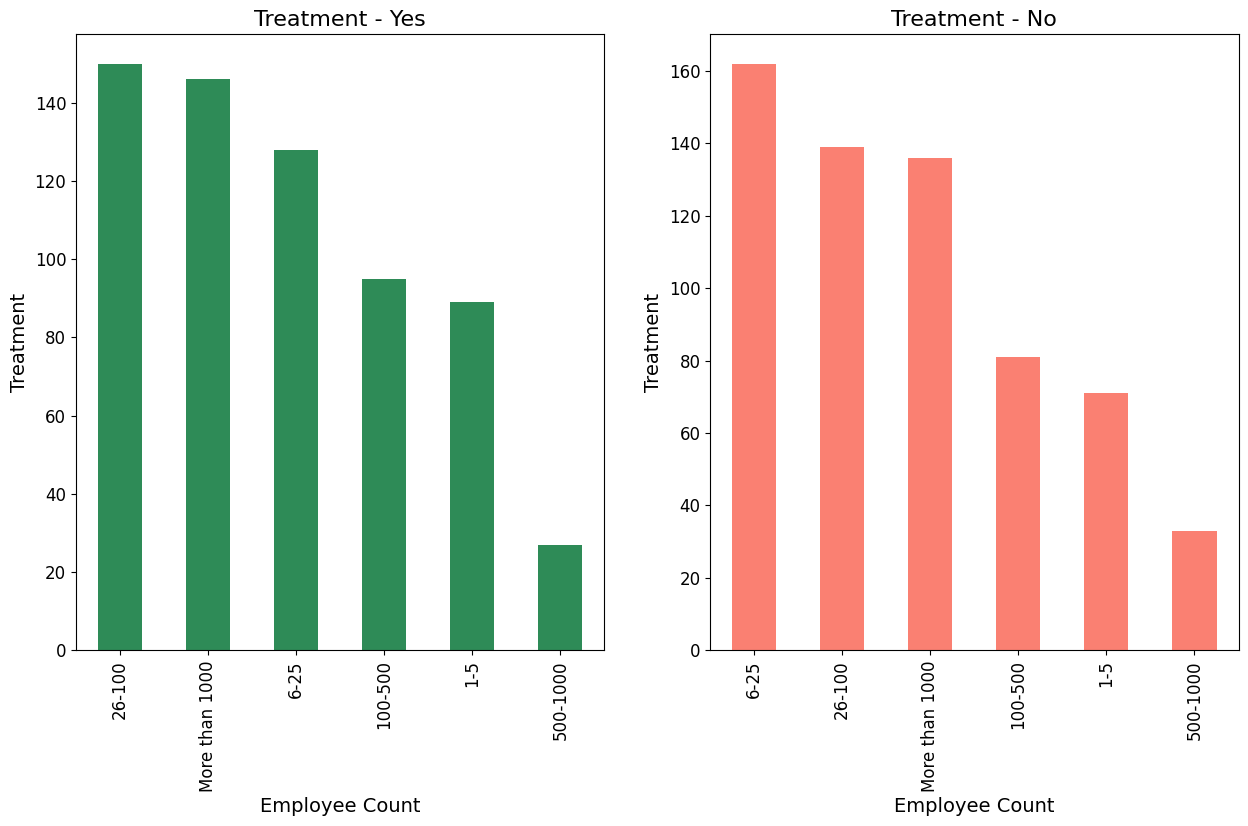

In [55]:
figure = plt.figure(figsize=(15,8))

plt.subplot(1,2,1)

data[data['treatment'] == 'Yes']['no_employees'].value_counts().plot.bar(color='seagreen')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Employee Count', size=14)
plt.ylabel(ylabel='Treatment', size=14)
plt.title(label='Treatment - Yes', size=16)


plt.subplot(1,2,2)

data[data['treatment'] == 'No']['no_employees'].value_counts().plot.bar(color='salmon')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Employee Count', size=14)
plt.ylabel(ylabel='Treatment', size=14)
plt.title(label='Treatment - No', size=16)

plt.show()

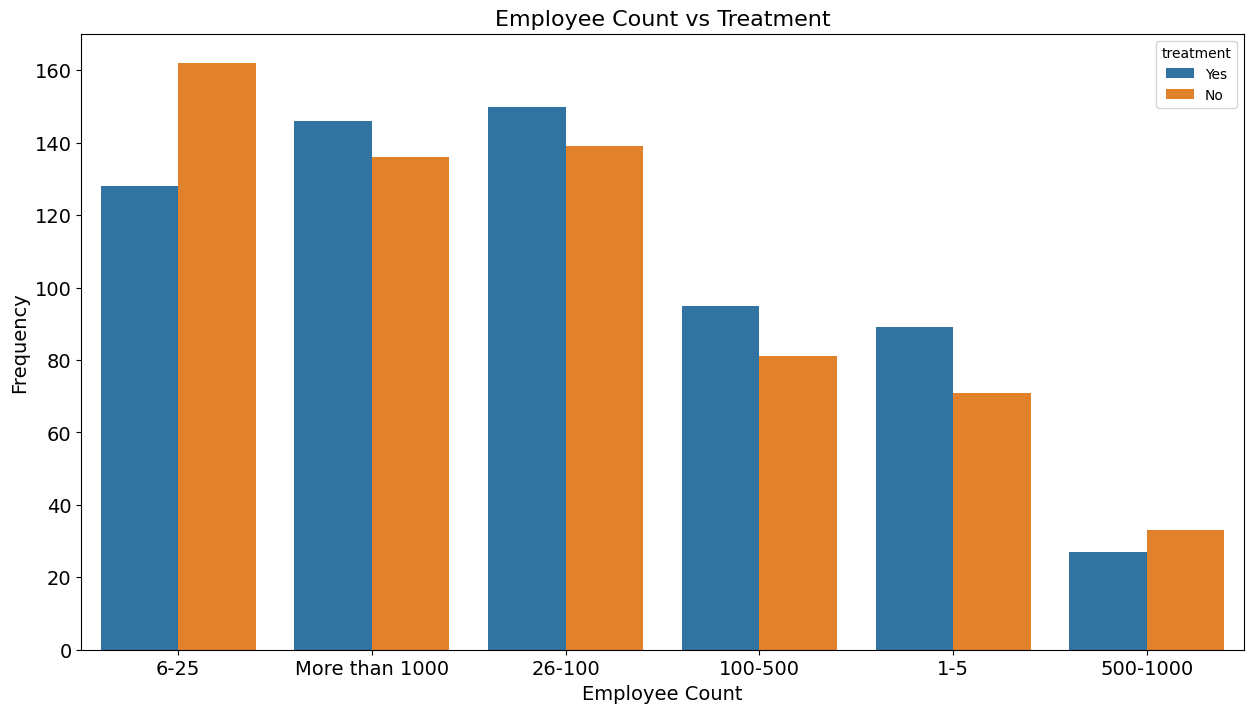

In [56]:
figure = plt.figure(figsize=[15, 8])

sns.countplot(x = 'no_employees', hue ='treatment', data=data)

plt.xticks(size=14)
plt.yticks(size=14)

plt.xlabel(xlabel ='Employee Count', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Employee Count vs Treatment', size=16)

plt.show()

- Based on the data, it can be inferred that the highest number of employees who sought mental health treatment belong to companies sized between **26-100** employees. 
- Conversely, the largest number of employees who did not seek treatment come from companies sized between **6-25** employees.

**Q.** Top 10 Countries recorded for mental health treatment?

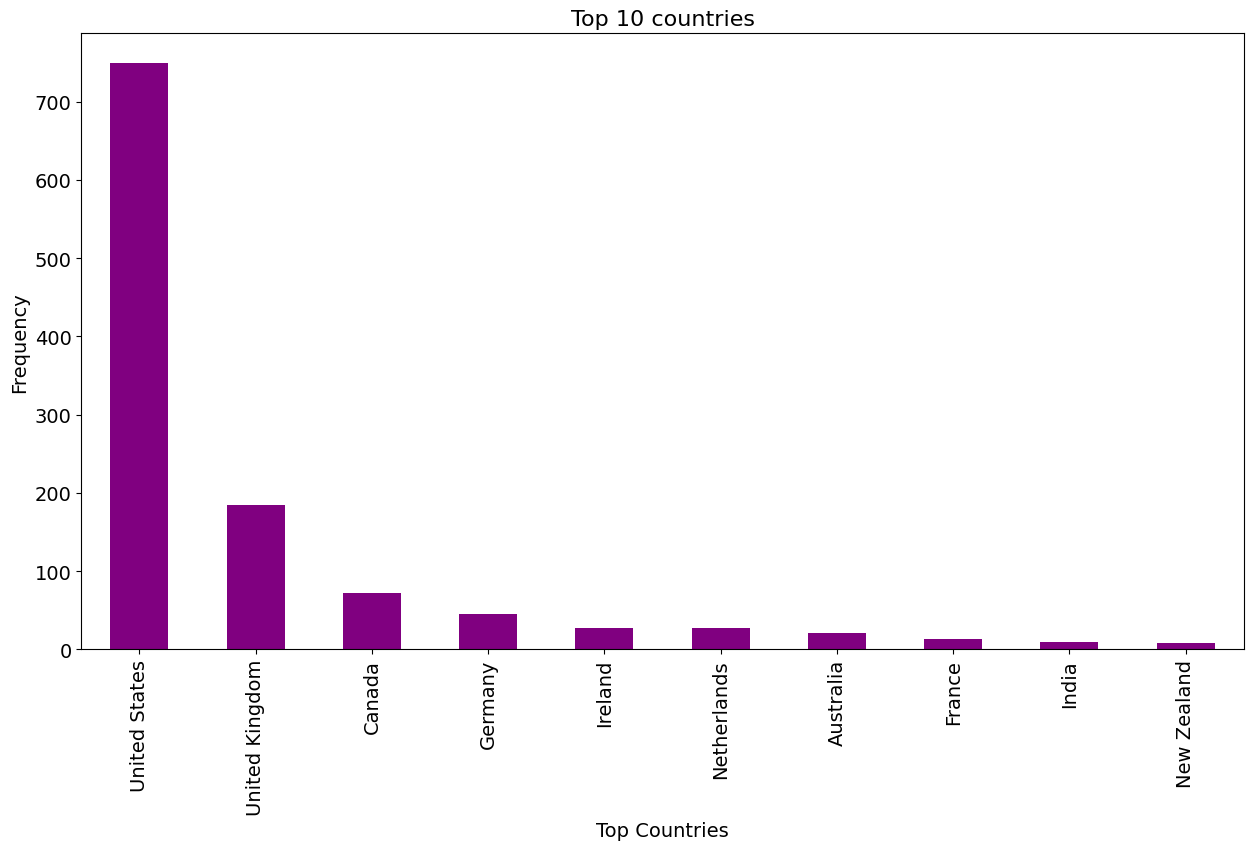

In [57]:
fig = plt.figure(figsize=[15,8])

data['Country'].value_counts().head(10).plot.bar(color='purple')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries', size=16)

plt.show()

- The majority of the records are from the United States, followed by the United Kingdom and Canada.

**Q.** Which countries are actually contributing more for mental health treatment?

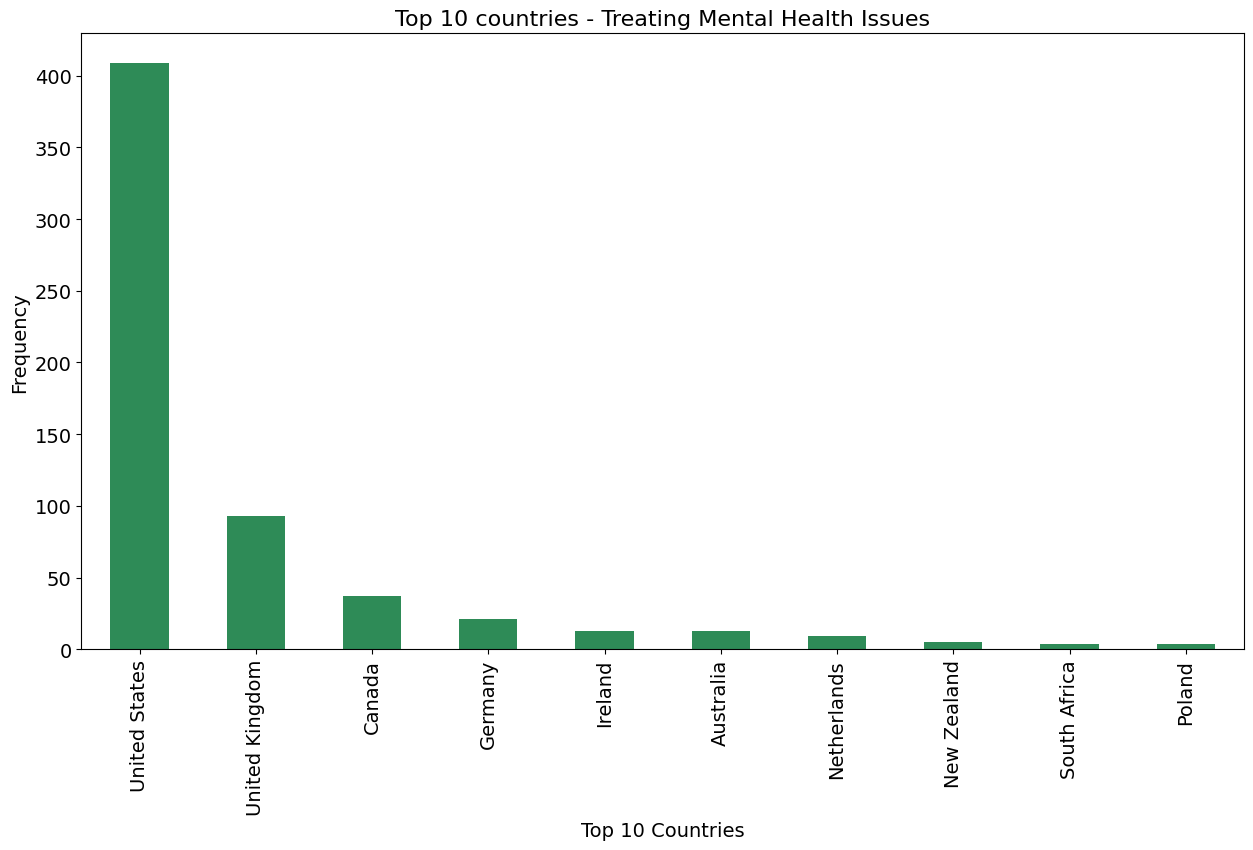

In [58]:
fig = plt.figure(figsize=[15,8])

data[data['treatment']== 'Yes']['Country'].value_counts().head(10).plot.bar(color='seagreen')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top 10 Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries - Treating Mental Health Issues', size=16)

plt.show()

- We observe a shift in the lower section of the bar chart, indicating countries where a **larger number** of individuals are seeking treatment for their mental health.

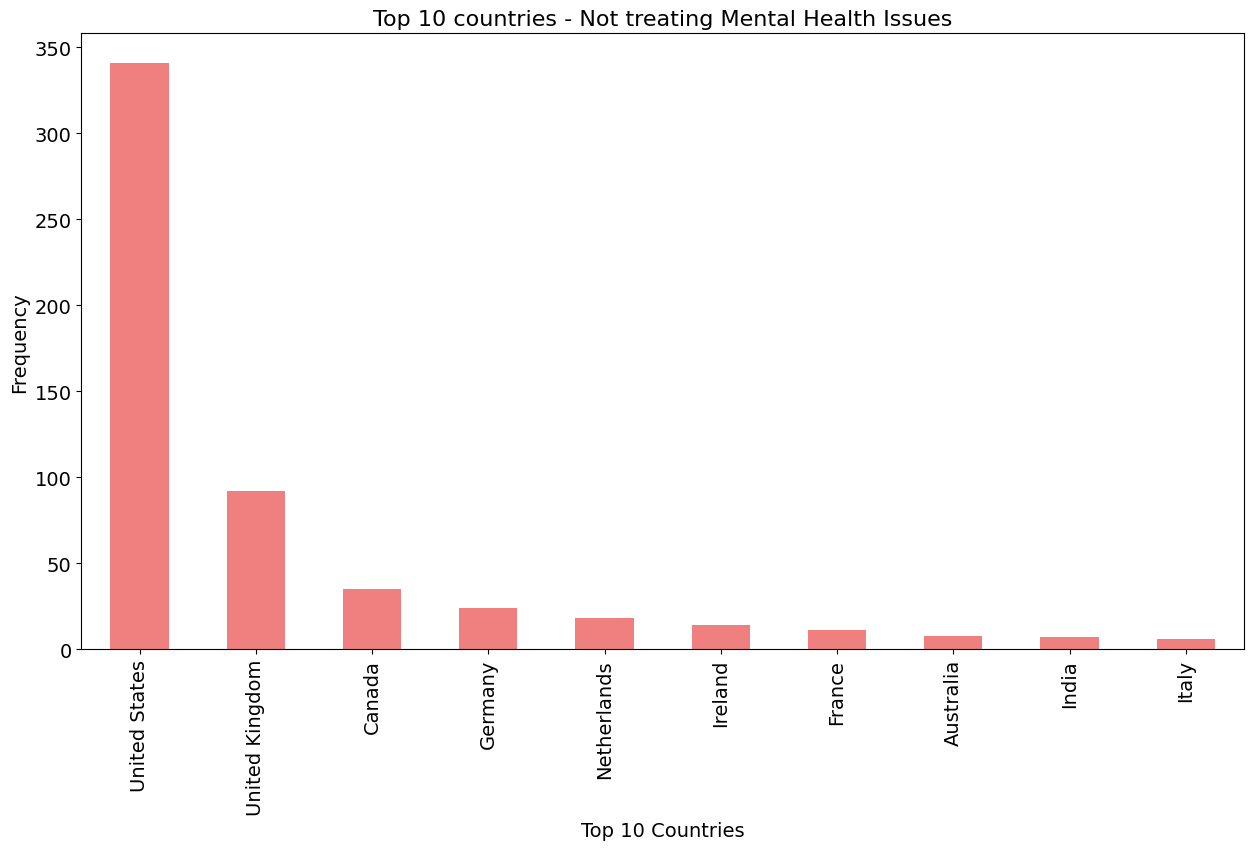

In [59]:
fig = plt.figure(figsize=[15,8])

data[data['treatment']== 'No']['Country'].value_counts().head(10).plot.bar(color='lightcoral')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top 10 Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries - Not treating Mental Health Issues', size=16)

plt.show()

- Presented are the Top 10 countries where individuals are **least** inclined to seek treatment for their mental health concerns.

- The data illustrates that the **United States**, **United Kingdom**, **Canada**, and **Germany** rank highest in both categories: **treating a significant number of individuals** with mental health issues and concurrently having the **highest number of untreated mental health cases**. This paradox within the statistics underscores the contradictory nature of our statement.

- To resolve the aforementioned paradox, let's conduct a comprehensive analysis focusing on the data distribution, specifically examining countries that meet the condition where **Treatment** equals **'Yes'** out of the **total values recorded**.

- **Let's calculate the ratio of observations from countries addressing mental health issues to the total number of countries included in the dataset.**

In [60]:
df_yes = data[data['treatment']== 'Yes']['Country'].value_counts().head(10)
df_yes.sort_values(ascending=False)

Country
United States     409
United Kingdom     93
Canada             37
Germany            21
Ireland            13
Australia          13
Netherlands         9
New Zealand         5
South Africa        4
Poland              4
Name: count, dtype: int64

In [61]:
data['Country'].value_counts().head(10)

Country
United States     750
United Kingdom    185
Canada             72
Germany            45
Ireland            27
Netherlands        27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64

In [62]:
df_yes.sort_values(ascending=False) / data['Country'].value_counts().head(10)

Country
Australia        0.62
Canada           0.51
France            NaN
Germany          0.47
India             NaN
Ireland          0.48
Netherlands      0.33
New Zealand      0.62
Poland            NaN
South Africa      NaN
United Kingdom   0.50
United States    0.55
Name: count, dtype: float64

In [63]:
df_yt = df_yes.sort_values(ascending=False) / data['Country'].value_counts().head(10)
df_yt.dropna().sort_values(ascending=False)

Country
New Zealand      0.62
Australia        0.62
United States    0.55
Canada           0.51
United Kingdom   0.50
Ireland          0.48
Germany          0.47
Netherlands      0.33
Name: count, dtype: float64

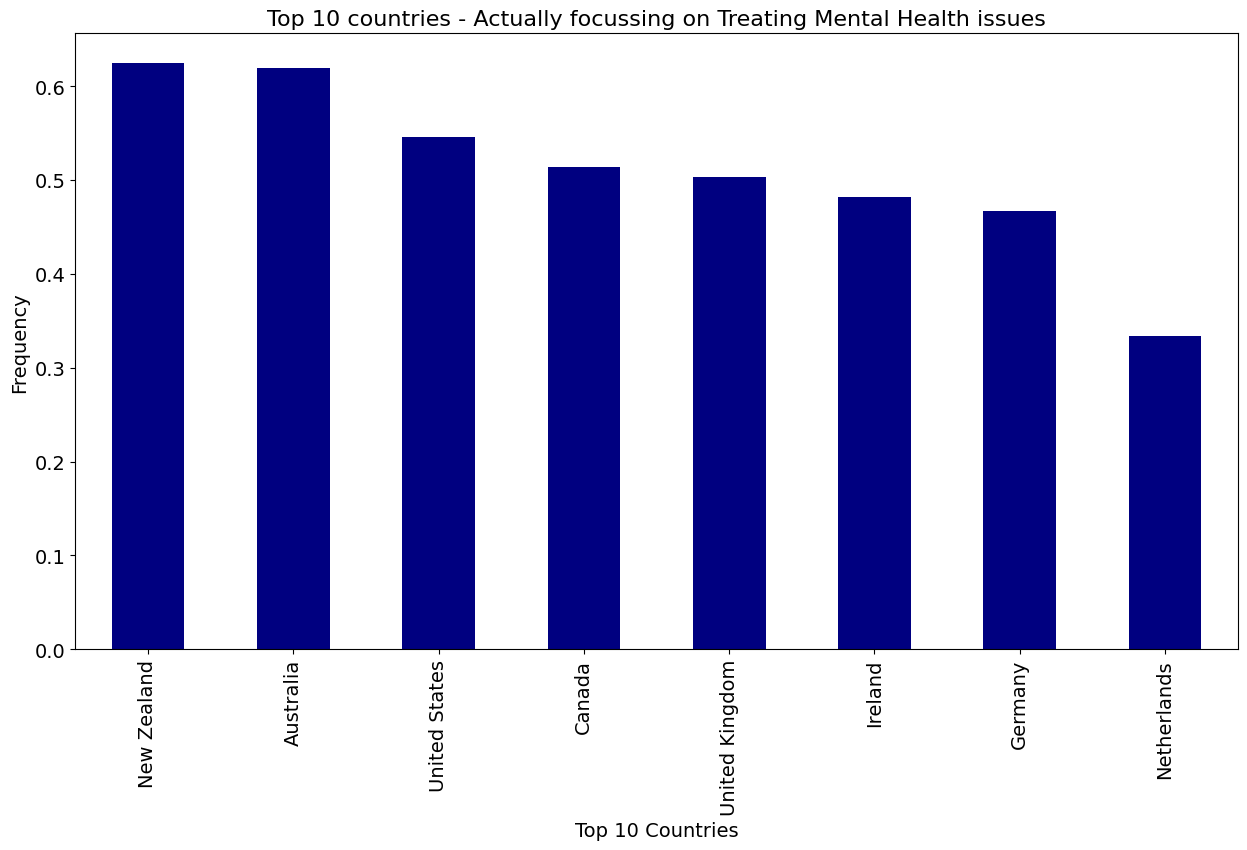

In [64]:
fig = plt.figure(figsize=[15,8])

df_yt.dropna().sort_values(ascending=False).plot.bar(color='navy')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top 10 Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries - Actually focussing on Treating Mental Health issues', size=16)

plt.show()

- These countries prioritize influencing a **significant proportion** of their population to address mental health issues, considering the total number of reported issues.
- **New Zealand** & **Australia** top the list, followed by United States & Canada.

**Q.** What is the contribution of top 3 countries among all in terms of mental health?

In [65]:
data['Country'].value_counts()[:3]

Country
United States     750
United Kingdom    185
Canada             72
Name: count, dtype: int64

In [66]:
list(data['Country'].value_counts()[:3].index)

['United States', 'United Kingdom', 'Canada']

In [67]:
data_top3 = data[data['Country'].isin(list(data['Country'].value_counts()[:3].index))]
data_top3.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,female,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,male,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,male,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [68]:
data_top3.shape

(1007, 25)

In [69]:
# Display the results

print('The number of people that exist from top 3 countries are: ', data_top3.shape[0])
print('Their proportion from total people surveyed is ', np.round(data_top3.shape[0]/data.shape[0], decimals=2))

The number of people that exist from top 3 countries are:  1007
Their proportion from total people surveyed is  0.8


**Q.** How many people did go for treatment based on gender for the top 3 countries?

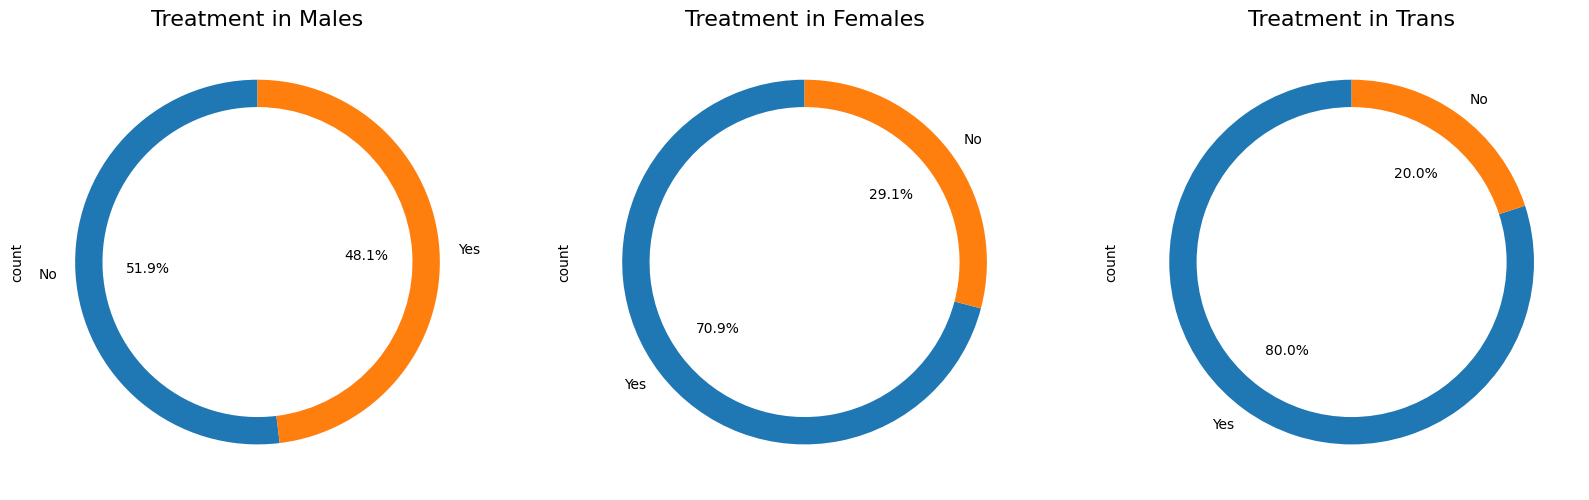

In [70]:
fig = plt.figure(figsize=[20,10])

plt.subplot(1,3,1)
data_top3['treatment'][data_top3['Gender'] == 'male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Males', size=16)

plt.subplot(1,3,2)
data_top3['treatment'][data_top3['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Females', size=16)

plt.subplot(1,3,3)
data_top3['treatment'][data_top3['Gender'] == 'trans'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Trans', size=16)

plt.show()

- **48%** of Males, **71%** of Females and **80%** of Trans, have gone through treatment among the top 3 countries.

**Q.** What is the frequency distribution of work interference among employees for the top 3 countries?

In [71]:
data_top3['work_interfere'].value_counts()

work_interfere
Sometimes    586
Never        173
Rarely       139
Often        109
Name: count, dtype: int64

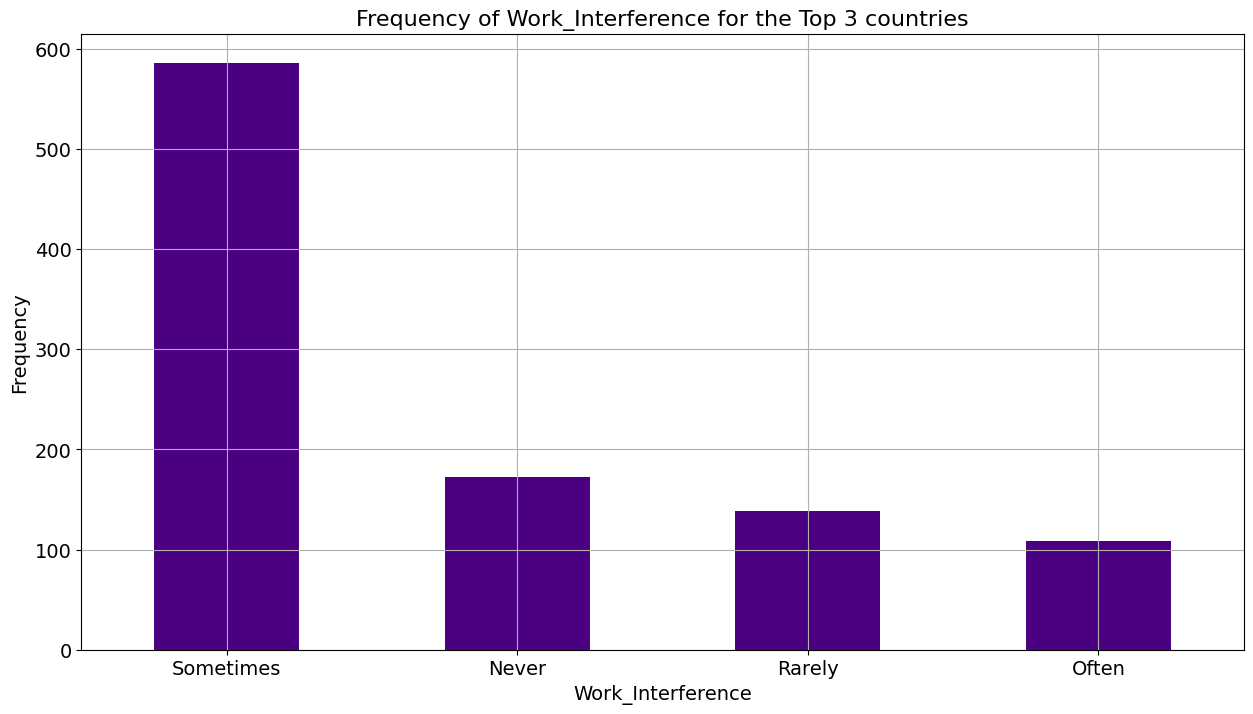

In [72]:
figure = plt.figure(figsize=(15,8))

data_top3['work_interfere'].value_counts().plot.bar(color='indigo')

plt.xticks(rotation=0, size=14)
plt.yticks(size=14)
plt.xlabel(xlabel= 'Work_Interference', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.title(label= 'Frequency of Work_Interference for the Top 3 countries', size=16)
plt.grid(True)

plt.show()

- The majority of individuals seeking treatment for their mental health issues experienced interference with their work at times.

**Q.**  Relation between Treatment and Mental Health Consequence?

'**mental_health_consequence** - Do you think that discussing a mental health issue with your employer would have negative consequences?'

In [73]:
data['mental_health_consequence'].value_counts()

mental_health_consequence
No       490
Maybe    477
Yes      290
Name: count, dtype: int64

In [74]:
data[data['treatment']=='Yes']['mental_health_consequence'].value_counts()

mental_health_consequence
Maybe    253
No       210
Yes      172
Name: count, dtype: int64

In [75]:
data[data['treatment']=='No']['mental_health_consequence'].value_counts()

mental_health_consequence
No       280
Maybe    224
Yes      118
Name: count, dtype: int64

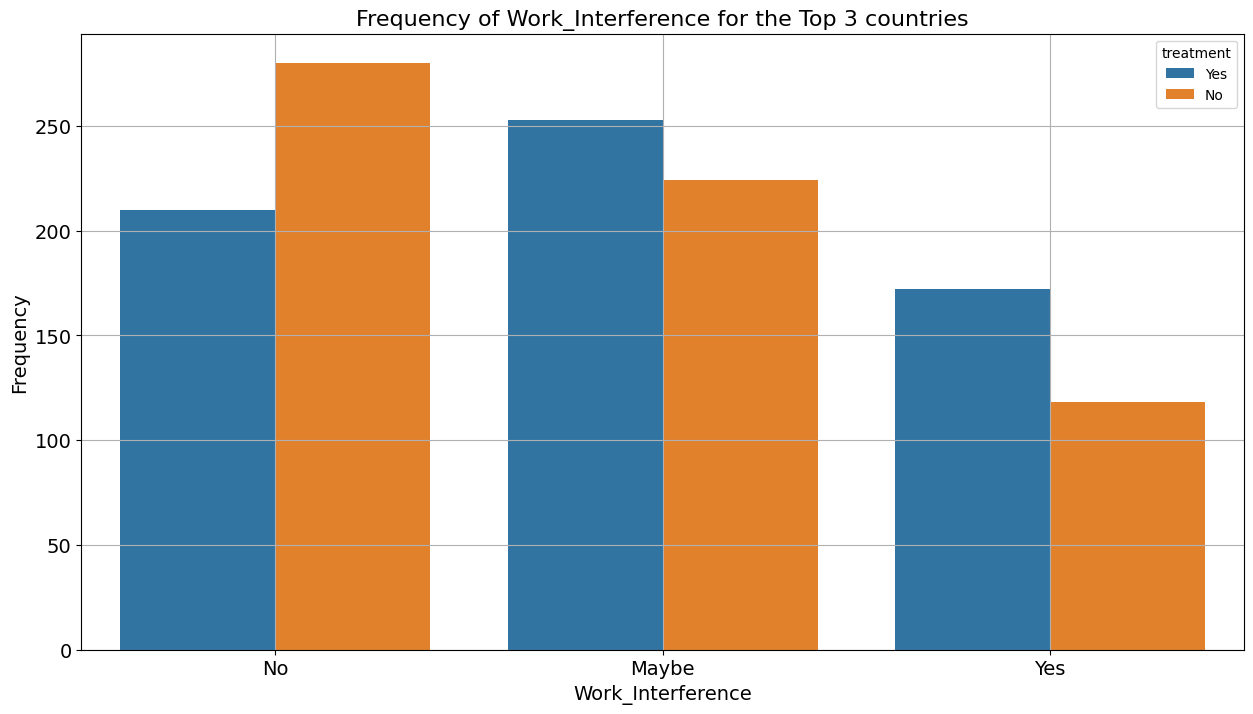

In [76]:
figure = plt.figure(figsize=(15,8))

sns.countplot(data=data, x='mental_health_consequence', hue='treatment')

plt.xticks(rotation=0, size=14)
plt.yticks(size=14)
plt.xlabel(xlabel= 'Work_Interference', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.title(label= 'Frequency of Work_Interference for the Top 3 countries', size=16)
plt.grid(True)

plt.show()

- Individuals who anticipate negative consequences when discussing their mental health issues with their employers show a higher willingness to seek treatment for their issues.

- Similarly, Individuals who feel comfortable discussing their mental health issues with their employers tend to show a lower willingness to seek treatment for their concerns.

**Q.** What is the relationship between mental health consequences and the attitude?

In [77]:
def attitude(x):
  """A custom function to map values in a feature."""
  
  if x == 'No':
    return 'Positive'
  elif x == 'Yes':
    return 'Negative'
  elif x == 'Maybe':
    return 'Moderate'
  else:
    return x

In [78]:
data['attitudes'] = data['mental_health_consequence'].apply(attitude)
data['attitudes'].value_counts()

attitudes
Positive    490
Moderate    477
Negative    290
Name: count, dtype: int64

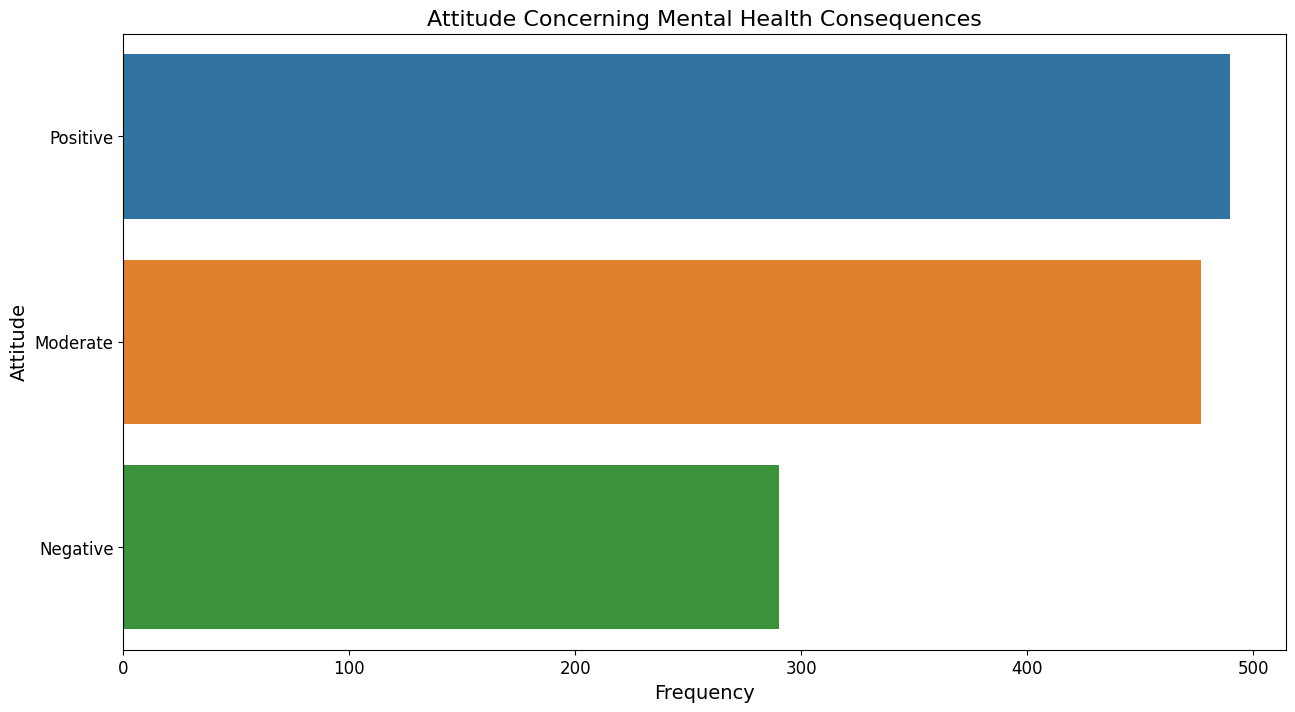

In [79]:
figure = plt.figure(figsize=[15, 8])

sns.countplot(y='attitudes', data=data)

plt.title(label='Attitude Concerning Mental Health Consequences', size=16)
plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Attitude', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.grid(b=True)

plt.show()

- The majority of individuals perceive their employers' attitudes to be more **positive** or **moderately supportive** rather than negative when addressing their mental health concerns.

**Q.**  How does age relate to various behaviors and/or their awareness of their employer's attitude toward mental health?

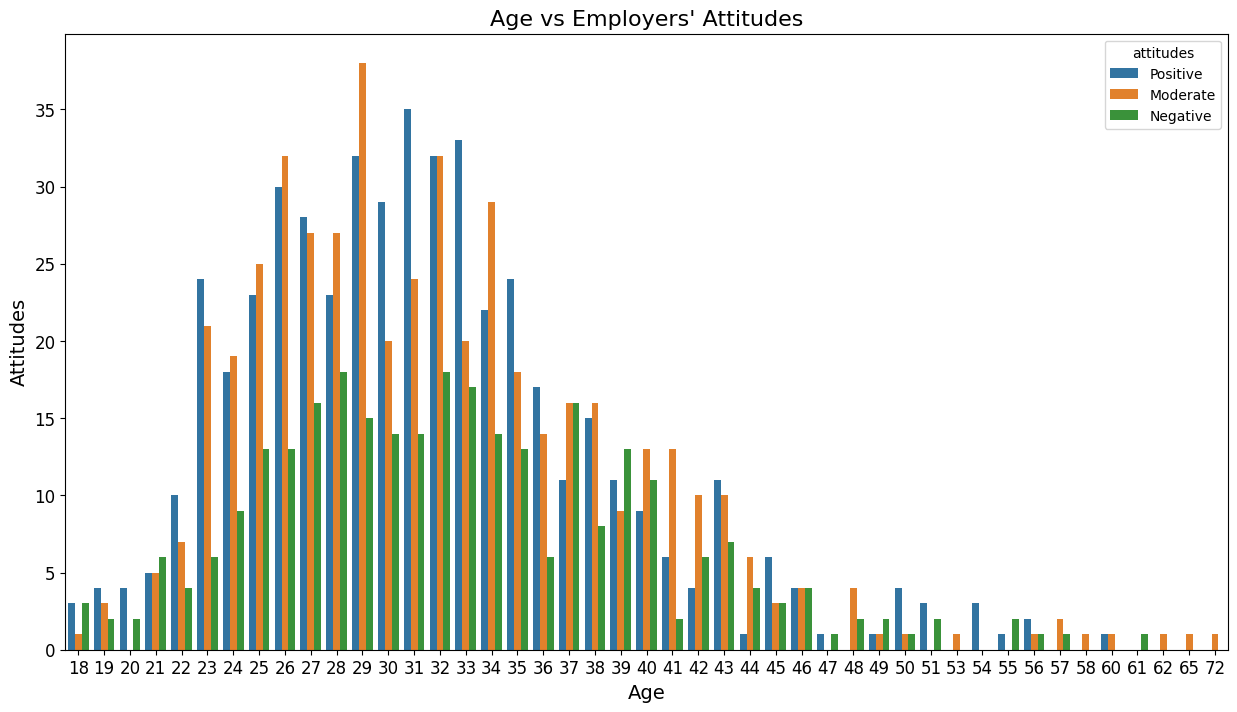

In [80]:
fig = plt.figure(figsize=(15, 8))

sns.countplot(x='Age', hue='attitudes', data=data)

plt.title(label="Age vs Employers' Attitudes", size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Attitudes', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.grid(b=True)

plt.show()

- This suggests that individuals in their **mid-20s** to **mid-30s** perceive their employers' attitude to be more positive or moderately supportive rather than negative when they discuss their mental health concerns.

# 8. Summarization

- **Conclusion:**
    - The mental health survey has helped us to understand the mental condition of employees working in tech firms across countries.

    - A total of **1259** entries were recorded during the survey out of which **1007** were recorded from the top 3 countries.

    - The **United States** leads the chart in terms of participation in the survey followed by the **United Kingdom** and **Canada**.

    - **45%** OF males, **69%** of females, and **79%** of trans were found to have sought treatment concerning the overall survey.
    
    - Likewise, data indicates that **48%** of males, **71%** of females, and **80%** of trans individuals have received treatment within the top three countries in the recorded datase

    - The following set of parameters are found to be affecting mental health the most and thus requires treatment:
        - Age
        - Family history,
        - Work Interference,
        - Number of employees working in a company,
        
    - **New Zealand** and **Australia** lead in prioritizing the resolution of employees' mental health issues, encouraging a higher number of individuals to seek treatment, followed by the **United States** and **Canada**.

-  **Actionable Insights:**

  - There should be an **awareness program** about mental health and its effects.
  - Implementing an awareness program on mental health and its effects is crucial to encourage greater participation from **males**, considering their **lower** representation among the survey participants.

  - Relationship Managers should provide supportive guidance to their employees.

  - **Managers** and **Employers** need to maintain **unbiased** attitudes toward both the work and the employees, offering appropriate measures and support for those experiencing mental health challenges.
  
  - Regular **appreciation** at work is beneficial for employee well-being.